# House Prices Attempt III: Gradient Boosting

My friends in the Data Science all say that XGboost is a very common tool. So I will test it out on this simple dataset.

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd


In [12]:
data = pd.read_csv("../data/train.csv")
data_augmented = pd.read_csv("../data-augmented/train_augmented.csv")
print(data.shape)

(1460, 81)


In [13]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

X = data_augmented
y = data['SalePrice'][data_augmented.index]

model = XGBRegressor(n_estimators=100)
model.fit(X,y)


cv_split = 4
cv_score = cross_val_score(model, X, y, cv=cv_split)
print("Score: %0.2f (+/- %0.2f)" % (cv_score.mean(), cv_score.std() * 2))

Score: 0.89 (+/- 0.04)


Big improvement over the other two models already.

In [4]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [10, 30, 100, 300, 1000]}

grid = GridSearchCV(XGBRegressor(),param_grid, cv = cv_split)
grid.fit(X,y)
model = grid.best_estimator_
cv_score = cross_val_score(model, X, y, cv=cv_split)
print("Score: %0.2f (+/- %0.2f)" % (cv_score.mean(), cv_score.std() * 2))

Score: 0.90 (+/- 0.03)


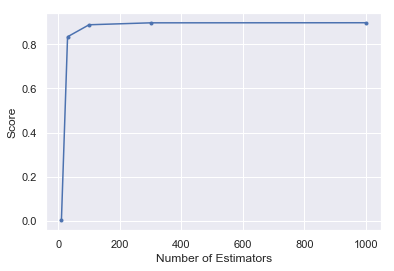

In [10]:
plt.plot(param_grid['n_estimators'],grid.cv_results_['mean_test_score'],'.-')
plt.xlabel('Number of Estimators')
plt.ylabel('Score');

<module 'matplotlib.pyplot' from 'C:\\Users\\mster\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

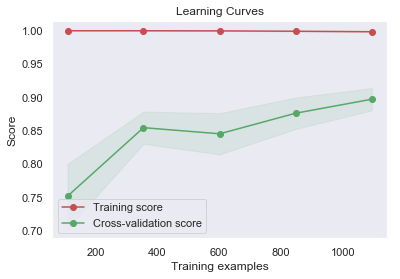

In [9]:
from plot_learning_curve import plot_learning_curve

title = 'Learning Curves'
plot_learning_curve(model,title,X,y,cv = cv_split)